In [96]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [97]:
amd_df = pd.read_pickle('amd_merged.pickle')

In [98]:
df = amd_df
df = df.drop(columns= ['LastPrice', 'Symbol', 'Volume', 'OpenInterest', 'Volume'])



In [99]:
df['ExpirationDate'] =  pd.to_datetime(df['ExpirationDate'], infer_datetime_format=True)
df['DataDate'] =  pd.to_datetime(df['DataDate'], infer_datetime_format=True)
df['delta'] = df['ExpirationDate'] - df['DataDate']

df['exp?'] =df['ExpirationDate'] ==df['DataDate']
df['long_close'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['long_medium'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['long_far'] = ((df['delta'] < np.timedelta64(14, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))
df['short_close'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.1) & (df['% out'] < 0))
df['short_medium'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.2) & (df['% out'] < -.1))
df['short_far'] = ((df['delta'] < np.timedelta64(8, 'D')) & (df['% out'] > -.3) & (df['% out'] < -.2))

pd.set_option('display.max_columns', 30)

In [100]:
df_table=df.loc[:, ['OptionKey', 'BidPrice']]
df_table=df_table.reset_index()
df_table.columns=['PriceDate', 'OptionKey', 'RebuyPrice']
df_table['RebuyPrice'].nunique()

424

In [101]:
xp = df
xp.loc[xp['exp?']== True, 'xp' ] = xp.loc[df['exp?'] == True, 'AskPrice']
xp = xp.loc[xp['exp?']== True]
xp= xp[['OptionKey', 'xp']]
xp

,OptionKey,xp
2019-11-15,AMD2019-11-15P23.00,0.01
2019-11-15,AMD2019-11-15P24.00,0.01
2019-11-15,AMD2019-11-15P25.00,0.01
2019-11-15,AMD2019-11-15P26.00,0.01
2019-11-15,AMD2019-11-15P27.00,0.01
...,...,...
2019-12-13,AMD2019-12-13P43.50,2.39
2019-12-13,AMD2019-12-13P44.00,2.89
2019-12-13,AMD2019-12-13P44.50,3.40
2019-12-13,AMD2019-12-13P45.00,4.00


In [102]:
df['xp']=df.OptionKey.map(xp.set_index('OptionKey')['xp'])
df

,OptionKey,ExpirationDate,AskPrice,BidPrice,PutCall,StrikePrice,UnderlyingPrice,DataDate,time delta,% out,LSTM Predicted Signal,RF Predicted Value,LSTM OTM Cr Entry,RF OTM Cr Entry,Bid Price,delta,exp?,long_close,long_medium,long_far,short_close,short_medium,short_far,xp
2019-11-15,AMD2019-11-15P23.00,2019-11-15,0.01,0.00,put,23.0,38.56,2019-11-15,0 days,-0.403527,1,1,0.0,0.0,0.0,0 days,True,False,False,False,False,False,False,0.01
2019-11-12,AMD2019-11-15P24.00,2019-11-15,0.01,0.00,put,24.0,36.71,2019-11-12,3 days,-0.346227,1,1,0.0,0.0,0.0,3 days,False,False,False,False,False,False,False,0.01
2019-11-15,AMD2019-11-15P24.00,2019-11-15,0.01,0.00,put,24.0,38.56,2019-11-15,0 days,-0.377593,1,1,0.0,0.0,0.0,0 days,True,False,False,False,False,False,False,0.01
2019-11-12,AMD2019-11-15P25.00,2019-11-15,0.01,0.00,put,25.0,36.71,2019-11-12,3 days,-0.318987,1,1,0.0,0.0,0.0,3 days,False,False,False,False,False,False,False,0.01
2019-11-15,AMD2019-11-15P25.00,2019-11-15,0.01,0.00,put,25.0,38.56,2019-11-15,0 days,-0.351660,1,1,0.0,0.0,0.0,0 days,True,False,False,False,False,False,False,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25,AMD2019-12-27P50.00,2019-12-27,10.35,10.15,put,50.0,39.79,2019-11-25,32 days,0.256597,-1,0,0.0,0.0,1015.0,32 days,False,False,False,False,False,False,False,NaN
2019-12-02,AMD2019-12-27P50.00,2019-12-27,11.40,11.20,put,50.0,38.73,2019-12-02,25 days,0.290989,-1,0,0.0,0.0,1120.0,25 days,False,False,False,False,False,False,False,NaN
2019-12-03,AMD2019-12-27P50.00,2019-12-27,11.20,11.00,put,50.0,38.90,2019-12-03,24 days,0.285347,-1,0,0.0,0.0,1100.0,24 days,False,False,False,False,False,False,False,NaN
2019-12-16,AMD2019-12-27P50.00,2019-12-27,7.80,7.60,put,50.0,42.35,2019-12-16,11 days,0.180638,1,1,780.0,780.0,760.0,11 days,False,False,False,False,False,False,False,NaN


In [103]:
short_close_LSTM = df.loc[(df['short_close']== True) & (df['LSTM Predicted Signal'] == 1)]
short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']
short_close_LSTM_total = short_close_LSTM['log'].sum()
print(short_close_LSTM_total)

2.3400000000000007


<ipython-input-103-1d9b8a5588f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_LSTM['log'] = short_close_LSTM['AskPrice'] - short_close_LSTM['xp']


In [104]:
short_close_RF = df.loc[(df['short_close']== True) & (df['RF Predicted Value'] == 1)]
short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']
short_close_RF_total = short_close_RF['log'].sum()
print(short_close_RF_total)

4.0


<ipython-input-104-26e370e263bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_close_RF['log'] = short_close_RF['AskPrice'] - short_close_RF['xp']


In [105]:
short_medium_LSTM = df.loc[(df['short_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']
short_medium_LSTM_total = short_medium_LSTM['log'].sum()
print(short_medium_LSTM_total)

0.37


<ipython-input-105-47cc65b57caf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_LSTM['log'] = short_medium_LSTM['AskPrice'] - short_medium_LSTM['xp']


In [106]:
short_medium_RF = df.loc[(df['short_medium']== True) & (df['RF Predicted Value'] == 1)]
short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']
short_medium_RF_total = short_medium_RF['log'].sum()
print(short_medium_RF_total)

0.45999999999999996


<ipython-input-106-3e62de6047f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_medium_RF['log'] = short_medium_RF['AskPrice'] - short_medium_RF['xp']


In [107]:
short_far_LSTM = df.loc[(df['short_far']== True) & (df['LSTM Predicted Signal'] == 1)]
short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']
short_far_LSTM_total = short_far_LSTM['log'].sum()
print(short_far_LSTM_total)

0.01


<ipython-input-107-97cde8b08bcc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_LSTM['log'] = short_far_LSTM['AskPrice'] - short_far_LSTM['xp']


In [108]:
short_far_RF = df.loc[(df['short_far']== True) & (df['RF Predicted Value'] == 1)]
short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']
short_far_RF_total = short_far_RF['log'].sum()
print(short_far_RF_total)

0.0


<ipython-input-108-18c5042b77ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_far_RF['log'] = short_far_RF['AskPrice'] - short_far_RF['xp']


In [109]:
long_close_LSTM = df.loc[(df['long_close']== True) & (df['LSTM Predicted Signal'] == 1)]
long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']
long_close_LSTM_total = long_close_LSTM['log'].sum()
print(long_close_LSTM_total)

9.73


<ipython-input-109-14bc539d4f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_LSTM['log'] = long_close_LSTM['AskPrice'] - long_close_LSTM['xp']


In [110]:
long_close_RF = df.loc[(df['long_close']== True) & (df['RF Predicted Value'] == 1)]
long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']
long_close_RF_total = long_close_RF['log'].sum()
print(long_close_RF_total)

16.68


<ipython-input-110-2c96faa3b979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_close_RF['log'] = long_close_RF['AskPrice'] - long_close_RF['xp']


In [111]:
long_far_RF = df.loc[(df['long_far']== True) & (df['RF Predicted Value'] == 1)]
long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']
long_far_RF_total = long_far_RF['log'].sum()
print(long_far_RF_total)

0.1


<ipython-input-111-42ba9debbf05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_RF['log'] = long_far_RF['AskPrice'] - long_far_RF['xp']


In [112]:
long_far_LSTM = df.loc[(df['long_far']== True) & (df['LSTM Predicted Signal'] == 1)]
long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']
long_far_LSTM_total = long_far_LSTM['log'].sum()
print(long_far_LSTM_total)

0.04


<ipython-input-112-ded057f9d0d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_far_LSTM['log'] = long_far_LSTM['AskPrice'] - long_far_LSTM['xp']


In [113]:
long_medium_LSTM = df.loc[(df['long_medium']== True) & (df['LSTM Predicted Signal'] == 1)]
long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']
long_medium_LSTM_total = long_medium_LSTM['log'].sum()
print(long_medium_LSTM_total)

1.35


<ipython-input-113-e86d80339e6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_LSTM['log'] = long_medium_LSTM['AskPrice'] - long_medium_LSTM['xp']


In [114]:
long_medium_RF = df.loc[(df['long_medium']== True) & (df['RF Predicted Value'] == 1)]
long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']
long_medium_RF_total = long_medium_RF['log'].sum()
print(long_medium_RF_total)

2.12


<ipython-input-114-29d39dcc6c84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  long_medium_RF['log'] = long_medium_RF['AskPrice'] - long_medium_RF['xp']


In [115]:
df = pd.DataFrame()
df['short_close_negatives_RF'] =(short_close_RF.log[(short_close_RF.log < 0)]).count(),
df['short_close_positives_RF'] =(short_close_RF.log[(short_close_RF.log > 0)]).count(),

df['short_close_negatives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log < 0)]).count(),
df['short_close_positives_LSTM'] =(short_close_LSTM.log[(short_close_LSTM.log > 0)]).count(),

df['short_medium_negatives_RF'] =(short_medium_RF.log[(short_medium_RF.log < 0)]).count(),
df['short_medium_positives_RF'] =(short_medium_RF.log[(short_medium_RF.log > 0)]).count(),

df['short_medium_negatives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log < 0)]).count(),
df['short_medium_positives_LSTM'] =(short_medium_LSTM.log[(short_medium_LSTM.log > 0)]).count(),

df['short_far_negatives_RF'] =(short_far_RF.log[(short_far_RF.log < 0)]).count(),
df['short_far_positives_RF'] =(short_far_RF.log[(short_far_RF.log > 0)]).count(),

df['short_far_negatives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log < 0)]).count(),
df['short_far_positives_LSTM'] =(short_far_LSTM.log[(short_far_LSTM.log > 0)]).count()


<AxesSubplot:title={'center':'Positive vs Negative Count over Short Expiration Window (weekly)'}>

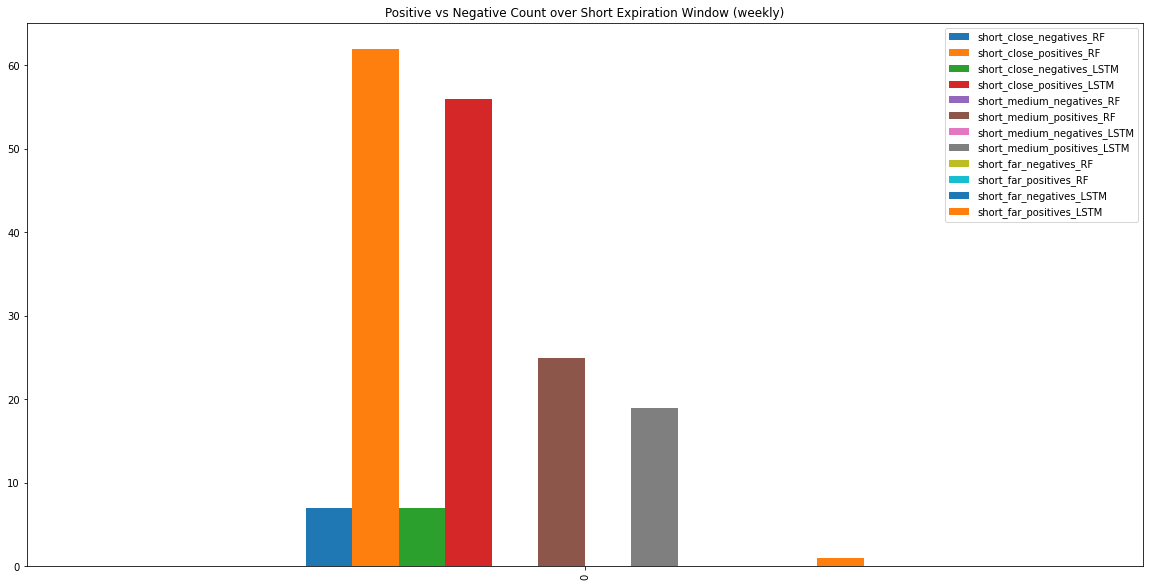

In [116]:
df.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (weekly)")

In [117]:
lf = pd.DataFrame()
lf['long_close_negatives_RF'] =(long_close_RF.log[(long_close_RF.log < 0)]).count(),
lf['long_close_positives_RF'] =(long_close_RF.log[(long_close_RF.log > 0)]).count(),

lf['long_close_negatives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log < 0)]).count(),
lf['long_close_positives_LSTM'] =(long_close_LSTM.log[(long_close_LSTM.log > 0)]).count(),

lf['long_medium_negatives_RF'] =(long_medium_RF.log[(long_medium_RF.log < 0)]).count(),
lf['long_medium_positives_RF'] =(long_medium_RF.log[(long_medium_RF.log > 0)]).count(),

lf['long_medium_negatives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log < 0)]).count(),
lf['long_medium_positives_LSTM'] =(long_medium_LSTM.log[(long_medium_LSTM.log > 0)]).count(),

lf['long_far_negatives_RF'] =(long_far_RF.log[(long_far_RF.log < 0)]).count(),
lf['long_far_positives_RF'] =(long_far_RF.log[(long_far_RF.log > 0)]).count(),

lf['long_far_negatives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log < 0)]).count(),
lf['long_far_positives_LSTM'] =(long_far_LSTM.log[(long_far_LSTM.log > 0)]).count()

<AxesSubplot:title={'center':'Positive vs Negative Count over Short Expiration Window (bi-weekly)'}>

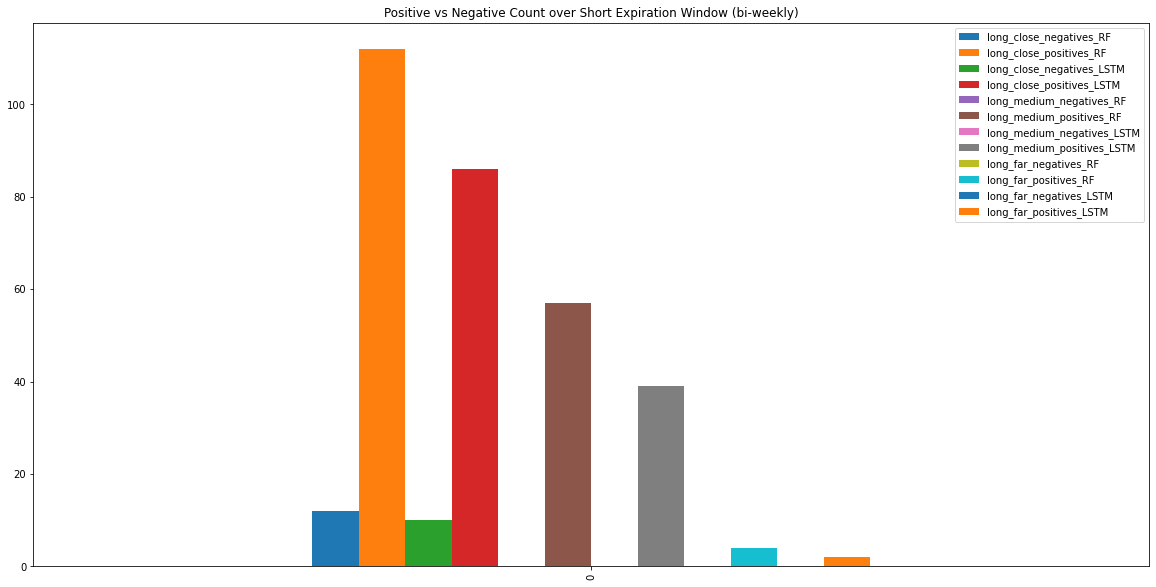

In [118]:
lf.plot(kind = 'bar', figsize = (20,10), title = "Positive vs Negative Count over Short Expiration Window (bi-weekly)")

In [119]:
short_equity_curve = pd.DataFrame()
short_equity_curve['short_close_RF_group'] = short_close_RF['log'].groupby(short_close_RF.index).sum()
short_equity_curve['short_close_RF_group'] = short_close_LSTM['log'].groupby(short_close_LSTM.index).sum()
short_equity_curve['short_medium_RF_group'] = short_medium_RF['log'].groupby(short_medium_RF.index).sum()
short_equity_curve['short_medium_LSTM_group'] = short_medium_LSTM['log'].groupby(short_medium_LSTM.index).sum()
short_equity_curve['short_far_RF_group'] = short_far_RF['log'].groupby(short_far_RF.index).sum()
short_equity_curve['short_far_LSTM_group'] = short_far_LSTM['log'].groupby(short_far_LSTM.index).sum()

In [120]:
short_equity_curve = short_equity_curve.cumsum()
short_equity_curve = short_equity_curve.fillna(method = 'backfill' )
short_equity_curve

,short_close_RF_group,short_medium_RF_group,short_medium_LSTM_group,short_far_RF_group,short_far_LSTM_group
2019-11-12,1.05,0.03,0.03,0.0,0.0
2019-11-13,2.15,0.04,0.04,0.0,0.0
2019-11-14,2.70,0.04,0.04,0.0,0.0
2019-11-15,4.70,0.22,0.22,0.0,0.0
2019-11-18,5.67,0.26,0.26,0.0,0.0
2019-11-19,2.74,0.32,0.32,0.0,0.0
2019-11-20,2.74,0.36,0.32,0.0,0.0
2019-11-21,2.74,0.36,0.32,0.0,0.0
2019-11-22,2.74,0.45,0.32,0.0,0.0
2019-11-26,2.74,0.46,0.32,0.0,0.0


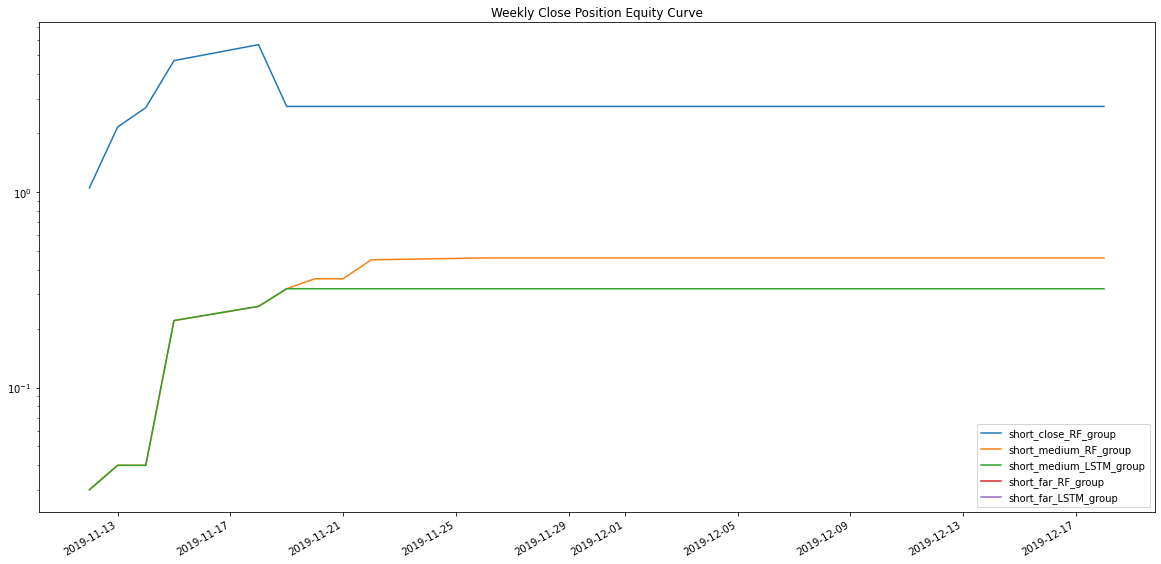

In [121]:
se = short_equity_curve.plot(logy = True, kind ='line', figsize = (20,10),title ="Weekly Close Position Equity Curve").get_figure()

In [122]:
se.savefig('amd_short_equity_curve')

In [123]:
long_equity_curve = pd.DataFrame()
long_equity_curve['long_close_RF_group'] = long_close_RF['log'].groupby(long_close_RF.index).sum()
long_equity_curve['long_close_LSTM_group'] =long_close_LSTM['log'].groupby(long_close_LSTM.index).sum()
long_equity_curve['long_medium_RF_group'] = long_medium_RF['log'].groupby(long_medium_RF.index).sum()
long_equity_curve['long_medium_LSTM_group'] = long_medium_LSTM['log'].groupby(long_medium_LSTM.index).sum()
long_equity_curve['long_far_RF_group'] = long_far_RF['log'].groupby(long_far_RF.index).sum()
long_equity_curve['long_far_LSTM_group'] = long_far_LSTM['log'].groupby(long_far_LSTM.index).sum()

In [124]:
long_equity_curve = long_equity_curve.cumsum()
long_equity_curve = long_equity_curve.fillna(method = 'backfill' )
long_equity_curve

,long_close_RF_group,long_close_LSTM_group,long_medium_RF_group,long_medium_LSTM_group,long_far_RF_group,long_far_LSTM_group
2019-11-12,3.73,3.73,0.14,0.14,0.00,0.00
2019-11-13,6.94,6.94,0.30,0.30,0.00,0.00
2019-11-14,9.31,9.31,0.51,0.51,0.00,0.00
2019-11-15,11.31,11.31,0.69,0.69,0.00,0.00
2019-11-18,13.84,13.84,0.94,0.94,0.00,0.00
2019-11-19,10.13,10.13,1.30,1.30,0.03,0.03
2019-11-20,8.57,10.13,1.64,1.30,0.09,0.03
2019-11-21,11.99,10.13,1.85,1.30,0.10,0.03
2019-11-22,14.12,10.13,1.94,1.30,0.10,0.03
2019-11-26,16.68,10.13,2.12,1.30,0.10,0.03


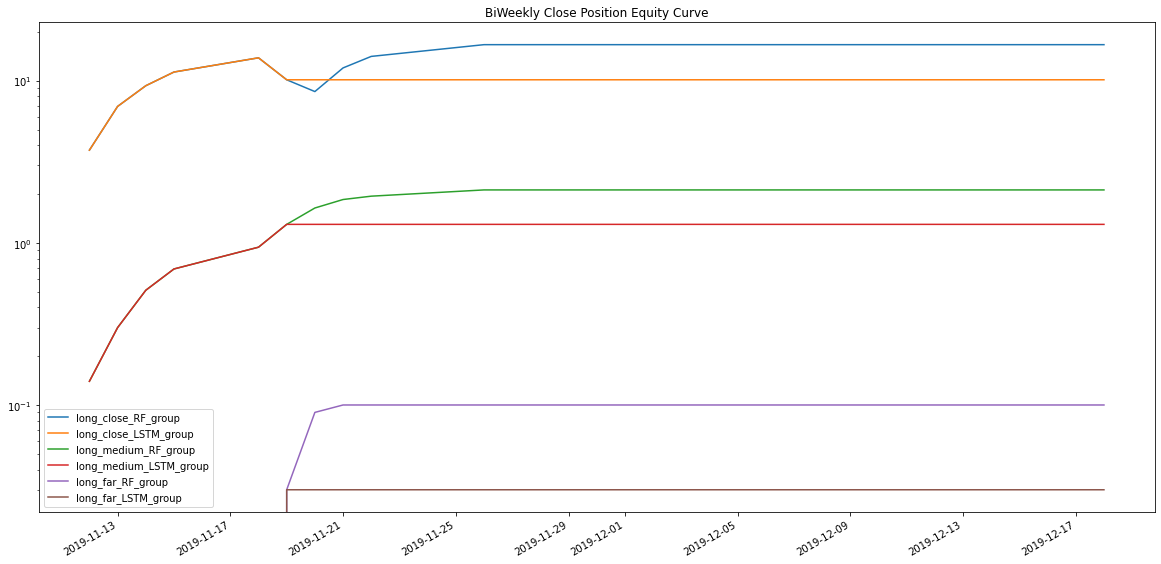

In [125]:
le = long_equity_curve.plot(logy= True, kind ='line', figsize = (20,10), title ="BiWeekly Close Position Equity Curve").get_figure()

In [126]:
le.savefig('amd_long_equity_curve')

In [127]:
print(f'the biggest loses were', short_close_RF_total)

the biggest loses were 4.0


In [128]:
print('Selling options expiring in a week and close to the money,\n RF generated:', short_close_RF_total, '\n LSTM generated:', short_close_LSTM_total)
print('\nSelling options expiring in a week and slightly out to the money,\n RF generated:', short_medium_RF_total, '\n LSTM generated:', short_medium_LSTM_total)
print('\nSelling options expiring in a week and far out to the money,\n RF generated:', short_far_RF_total, '\n LSTM generated:', short_far_LSTM_total)


Selling options expiring in a week and close to the money,
 RF generated: 4.0 
 LSTM generated: 2.3400000000000007

Selling options expiring in a week and slightly out to the money,
 RF generated: 0.45999999999999996 
 LSTM generated: 0.37

Selling options expiring in a week and far out to the money,
 RF generated: 0.0 
 LSTM generated: 0.01


In [129]:
print('Selling options expiring in a two weeks and close to the money,\n RF generated:', long_close_RF_total, '\n LSTM generated:', long_close_LSTM_total)
print('\nSelling options expiring in two weeks and slightly out to the money,\n RF generated:', long_medium_RF_total, '\n LSTM generated:', long_medium_LSTM_total)
print('\nSelling options expiring in two weeks and far out to the money,\n RF generated:', long_far_RF_total, '\n LSTM generated:', long_far_LSTM_total)


Selling options expiring in a two weeks and close to the money,
 RF generated: 16.68 
 LSTM generated: 9.73

Selling options expiring in two weeks and slightly out to the money,
 RF generated: 2.12 
 LSTM generated: 1.35

Selling options expiring in two weeks and far out to the money,
 RF generated: 0.1 
 LSTM generated: 0.04


In [147]:
#max DD calculation
maxDDLE = 0

for (columnName, columnData) in long_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDLE:
            maxDDLE = x

maxDDSE = 0

for (columnName, columnData) in short_equity_curve.iteritems():
    for x in columnData:
        if x < maxDDSE:
            maxDDSE = x
            
print(f'Short window max DD {maxDDSE}')            
print(f'Long window max DD {maxDDLE}')

Short window max DD 0
Long window max DD 0
